In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\Question2.csv')
df.head()

,Unnamed: 0,label,message
0,C:/Users/MSI PC/lingspam_public/bare\part1\3-1...,ham,"> date : sun , 15 dec 91 02 : 25 : 02 est > fr..."
1,C:/Users/MSI PC/lingspam_public/bare\part1\3-1...,ham,the discussion of s - > np + np reminds me tha...
2,C:/Users/MSI PC/lingspam_public/bare\part1\3-1...,ham,. . . for me it 's much more restrictive than ...
3,C:/Users/MSI PC/lingspam_public/bare\part1\3-3...,ham,""" for the listserv "" international conference ..."
4,C:/Users/MSI PC/lingspam_public/bare\part1\3-3...,ham,could anyone point me to any books and article...


In [3]:
df.groupby('label').describe()

Unnamed: 0                                                            \
           count unique                                                top   
label                                                                        
ham         9648   9648  C:/Users/MSI PC/lingspam_public/bare\part8\6-8...   
spam        1924   1924  C:/Users/MSI PC/lingspam_public/lemm_stop\part...   

           message                                                            \
      freq   count unique                                                top   
label                                                                          
ham      1    9648   9590  = = = = = = = = = = = = = = = = = = = = = = = ...   
spam     1    1924   1822  this be not spam ; you be receive this message...   

            
      freq  
label       
ham      4  
spam     5

In [4]:
df['spam']=df['label'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Unnamed: 0,label,message,spam
0,C:/Users/MSI PC/lingspam_public/bare\part1\3-1...,ham,"> date : sun , 15 dec 91 02 : 25 : 02 est > fr...",0
1,C:/Users/MSI PC/lingspam_public/bare\part1\3-1...,ham,the discussion of s - > np + np reminds me tha...,0
2,C:/Users/MSI PC/lingspam_public/bare\part1\3-1...,ham,. . . for me it 's much more restrictive than ...,0
3,C:/Users/MSI PC/lingspam_public/bare\part1\3-3...,ham,""" for the listserv "" international conference ...",0
4,C:/Users/MSI PC/lingspam_public/bare\part1\3-3...,ham,could anyone point me to any books and article...,0


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(df.message,df.spam
                                               )

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

In [10]:
x_train_count=v.fit_transform(x_train.values)
x_train_count
# x_train_count.toarray()[:2]

<8679x66567 sparse matrix of type '<class 'numpy.int64'>'
	with 1708869 stored elements in Compressed Sparse Row format>

In [11]:
x_train_count.toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [21,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [6]:
# from sklearn.feature_extraction.text import CountVectorizer
# v=CountVectorizer()
# x_train_count=v.fit_transform(x_train.values)
# x_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [8]:
x_test_count = v.transform(x_test)
model.score(x_test_count, y_test)

0.9951607328033184

In [9]:
y_predicted = model.predict(x_test_count)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2409,   13],
       [   1,  470]], dtype=int64)

Text(24.0, 0.5, 'Truth')

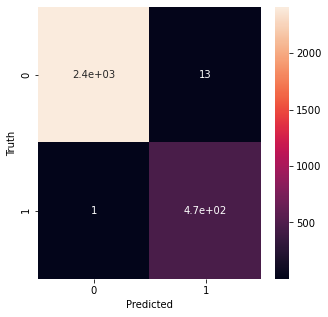

In [11]:
import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')